#**A20000908_Mostafa Walid**

**General requirements**

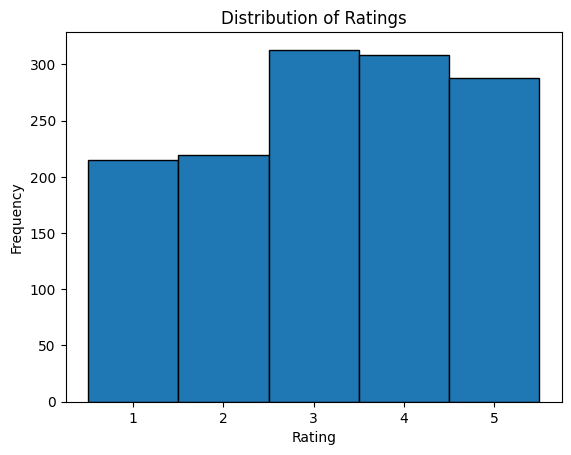

Matrix sparsity: 10.47%
Mean rating: 3.17
Rating counts:
3.0    313
4.0    308
5.0    288
2.0    219
1.0    215
Name: count, dtype: int64
Summary of Results:
num_users: 50
num_items: 30
ratings_per_item: {'Socialist Realism': 45, 'Come the Morning': 48, 'Nine Ball': 40, 'The Perfect Shadow': 41, 'Seevalaperi Pandi': 48, 'Universal Groove': 48, "The Killer's Game": 43, 'I giganti del cielo': 49, 'Land of Nairi': 45, 'The Promise of Perfume': 45, 'The Flash': 47, 'Moe': 44, 'American Surfrider': 44, "L'homme au bÃ¢ton, une lÃ©gende crÃ©ole": 45, 'Family Business': 46, "Rain Falls from Earth: Surviving Cambodia's Darkest Hour": 47, 'Neil': 44, 'A Small Problem': 43, "Maybe It's True What They Say About Us": 43, 'The Problem with People': 43, 'September': 42, 'The Last Voyage of the Demeter': 44, 'The Dog Thief': 46, 'Power Alley': 44, 'Falling Stars': 43, 'The Probe': 45, 'The Christmas Spirit': 46, 'Fear and Love: The Story of the Exorcist': 48, 'Amityville: Where the Echo Lives': 40, 'T

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
df = pd.read_csv("user_item_ratings.csv", index_col=0)

# Step 1: Count the total number of users and items
num_users = df.shape[1]
num_items = df.shape[0]

# Save results
unique_users = df.columns.tolist()
unique_items = df.index.tolist()

# Step 2: Count the number of ratings for every product
ratings_per_item = df.notna().sum(axis=1)

# Step 3: Draw the distribution of ratings
all_ratings = df.stack().astype(float)  # Flatten the DataFrame to extract all ratings
plt.hist(all_ratings, bins=np.arange(0.5, 6, 1), edgecolor='black')
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

# Step 4: Check matrix sparsity and bias
total_possible_ratings = df.size
total_actual_ratings = df.notna().sum().sum()
sparsity = 1 - (total_actual_ratings / total_possible_ratings)

# Check for bias (e.g., mean rating and rating counts)
mean_rating = all_ratings.mean()
rating_counts = df.stack().value_counts()

print(f"Matrix sparsity: {sparsity:.2%}")
print(f"Mean rating: {mean_rating:.2f}")
print(f"Rating counts:\n{rating_counts}")

# Step 5: Choose the two lowest-rated items
average_ratings_per_item = df.mean(axis=1)
lowest_rated_items = average_ratings_per_item.nsmallest(2).index.tolist()

# Step 6: Save results
results = {
    "num_users": num_users,
    "num_items": num_items,
    "ratings_per_item": ratings_per_item.to_dict(),
    "matrix_sparsity": sparsity,
    "mean_rating": mean_rating,
    "lowest_rated_items": lowest_rated_items
}

# Print summary
print("Summary of Results:")
for key, value in results.items():
    print(f"{key}: {value}")

**Part 1**

In [8]:
import pandas as pd
import numpy as np

# Load the dataset (adjust file path as necessary)
df = pd.read_csv("user_item_ratings.csv", index_col=0)

# Define target items by their names
target_items = ['Seevalaperi Pandi', 'The Christmas Spirit']

# Step 3.2.1: Calculate average rating for target items
mean_ratings = {}
for item in target_items:
    mean_ratings[item] = df.loc[item].mean()

print("\nMean Ratings for Target Items:")
print(pd.DataFrame(mean_ratings.items(), columns=["Item", "Mean Rating"]))

# Step 3.2.2: Replace missing ratings with mean values for target items
for item in target_items:
    df.loc[item] = df.loc[item].fillna(mean_ratings[item])

# Step 3.2.3: Calculate average rating for each item
item_means = df.mean(axis=1)

print("\nAverage Ratings for All Items:")
print(item_means.to_frame(name="Average Rating").head())

# Step 3.2.4: Calculate the difference between ratings and mean for each item
rating_differences = df.sub(item_means, axis=0)

print("\nRating Differences (First 5 Items):")
print(rating_differences.head())

# Step 3.2.5: Compute covariance for each pair of items
covariance_matrix = rating_differences.T.cov()

print("\nCovariance Matrix (First 5 Items):")
print(covariance_matrix.head())

# Step 3.2.6: Determine top 5 and top 10 peers for target items
top_peers = {}
for item in target_items:
    item_covariances = covariance_matrix.loc[item]
    sorted_items = item_covariances.sort_values(ascending=False).index
    top_peers[item] = {
        "top_5": sorted_items[1:6].tolist(),
        "top_10": sorted_items[1:11].tolist(),
    }

print("\nTop Peers for Target Items:")
for item, peers in top_peers.items():
    print(f"\n{item}:")
    print(f"Top 5 Peers: {', '.join(peers['top_5'])}")
    print(f"Top 10 Peers: {', '.join(peers['top_10'])}")

# Step 3.2.8: Reduced dimensional space for each user (top 5-peers)
df_transposed = df.T  # Transpose to make items columns
reduced_space_5 = {}
for item in target_items:
    peers = top_peers[item]["top_5"]
    reduced_space_5[item] = df_transposed[peers].fillna(0)

# Step 3.2.9: Predict missing ratings using top 5-peers
predicted_ratings_5 = {}
for item in target_items:
    peers = top_peers[item]["top_5"]
    reduced_data = reduced_space_5[item]
    mean_ratings = reduced_data.mean(axis=1)  # Mean ratings for each user
    predicted_ratings_5[item] = mean_ratings

print("\nPredicted Ratings (Top 5-Peers):")
for item, predictions in predicted_ratings_5.items():
    print(f"\nPredicted ratings for {item}:\n")
    print(predictions.to_frame(name="Predicted Rating").head())

# Step 3.2.10: Reduced dimensional space for each user (top 10-peers)
reduced_space_10 = {}
for item in target_items:
    peers = top_peers[item]["top_10"]
    reduced_space_10[item] = df_transposed[peers].fillna(0)

# Step 3.2.11: Predict missing ratings using top 10-peers
predicted_ratings_10 = {}
for item in target_items:
    peers = top_peers[item]["top_10"]
    reduced_data = reduced_space_10[item]
    mean_ratings = reduced_data.mean(axis=1)  # Mean ratings for each user
    predicted_ratings_10[item] = mean_ratings

print("\nPredicted Ratings (Top 10-Peers):")
for item, predictions in predicted_ratings_10.items():
    print(f"\nPredicted ratings for {item}:\n")
    print(predictions.to_frame(name="Predicted Rating").head())

# Step 3.2.12: Compare results of top 5 and top 10-peers
comparison = []
for item in target_items:
    comparison.append({
        "Item": item,
        "Top 5 Mean": predicted_ratings_5[item].mean(),
        "Top 10 Mean": predicted_ratings_10[item].mean(),
    })

print("\nComparison of Top 5 vs. Top 10 Peers:")
print(pd.DataFrame(comparison))


Mean Ratings for Target Items:
                   Item  Mean Rating
0     Seevalaperi Pandi      2.75000
1  The Christmas Spirit      2.76087

Average Ratings for All Items:
                    Average Rating
Socialist Realism         3.222222
Come the Morning          3.375000
Nine Ball                 3.275000
The Perfect Shadow        2.975610
Seevalaperi Pandi         2.750000

Rating Differences (First 5 Items):
                       User1     User2     User3    User4     User5     User6  \
Socialist Realism  -2.222222  1.777778  1.777778      NaN -0.222222 -0.222222   
Come the Morning         NaN -2.375000  0.625000 -0.37500 -1.375000  0.625000   
Nine Ball           0.725000 -1.275000       NaN  1.72500 -1.275000       NaN   
The Perfect Shadow       NaN -0.975610  1.024390  0.02439 -0.975610  1.024390   
Seevalaperi Pandi  -1.750000 -0.750000  2.250000  0.25000  0.250000 -1.750000   

                       User7     User8     User9   User10  ...    User41  \
Socialist Reali

**Part 2**

In [6]:
import pandas as pd
import numpy as np

# Load the dataset
# Ensure "user_item_ratings.csv" is the same as in previous steps
df = pd.read_csv("user_item_ratings.csv", index_col=0)

# Define target items by their names
target_items = ['Seevalaperi Pandi', 'The Christmas Spirit']

# Step 3.3.1: Generate the covariance matrix using Maximum Likelihood Estimation (MLE)
def mle_covariance_matrix(ratings_df):
    """Calculate the covariance matrix using MLE."""
    item_names = ratings_df.index
    cov_matrix = pd.DataFrame(index=item_names, columns=item_names, dtype=float)

    for item1 in item_names:
        for item2 in item_names:
            common_users = ratings_df.loc[[item1, item2]].dropna(axis=1, how='any')
            if len(common_users.columns) > 0:
                cov_matrix.loc[item1, item2] = np.cov(common_users.loc[item1], common_users.loc[item2], bias=True)[0, 1]
            else:
                cov_matrix.loc[item1, item2] = 0

    return cov_matrix

mle_cov_matrix = mle_covariance_matrix(df)

print("\nMLE Covariance Matrix (First 5 Items):")
print(mle_cov_matrix.head())

# Step 3.3.2: Determine the top 5 and top 10 peers for target items using MLE covariance matrix
top_peers_mle = {}
for item in target_items:
    item_covariances = mle_cov_matrix.loc[item]
    sorted_items = item_covariances.sort_values(ascending=False).index
    top_peers_mle[item] = {
        "top_5": sorted_items[1:6].tolist(),  # Exclude the item itself
        "top_10": sorted_items[1:11].tolist(),
    }

print("\nTop Peers for Target Items (MLE Covariance):")
for item, peers in top_peers_mle.items():
    print(f"\n{item}:")
    print(f"Top 5 Peers: {', '.join(peers['top_5'])}")
    print(f"Top 10 Peers: {', '.join(peers['top_10'])}")

# Step 3.3.3: Reduced dimensional space for each user using top 5-peers
reduced_space_mle_5 = {}
df_transposed = df.T  # Transpose to make items columns
for item in target_items:
    peers = top_peers_mle[item]["top_5"]
    reduced_space_mle_5[item] = df_transposed[peers].fillna(0)

# Step 3.3.4: Predict missing ratings for top 5-peers
predicted_ratings_mle_5 = {}
for item in target_items:
    peers = top_peers_mle[item]["top_5"]
    reduced_data = reduced_space_mle_5[item]
    mean_ratings = reduced_data.mean(axis=1)  # Mean ratings for each user
    predicted_ratings_mle_5[item] = mean_ratings

print("\nPredicted Ratings (MLE Top 5-Peers):")
for item, predictions in predicted_ratings_mle_5.items():
    print(f"\nPredicted ratings for {item} (Top 5-Peers):\n")
    print(predictions.to_frame(name="Predicted Rating").head())

# Step 3.3.5: Reduced dimensional space for each user using top 10-peers
reduced_space_mle_10 = {}
for item in target_items:
    peers = top_peers_mle[item]["top_10"]
    reduced_space_mle_10[item] = df_transposed[peers].fillna(0)

# Step 3.3.6: Predict missing ratings for top 10-peers
predicted_ratings_mle_10 = {}
for item in target_items:
    peers = top_peers_mle[item]["top_10"]
    reduced_data = reduced_space_mle_10[item]
    mean_ratings = reduced_data.mean(axis=1)  # Mean ratings for each user
    predicted_ratings_mle_10[item] = mean_ratings

print("\nPredicted Ratings (MLE Top 10-Peers):")
for item, predictions in predicted_ratings_mle_10.items():
    print(f"\nPredicted ratings for {item} (Top 10-Peers):\n")
    print(predictions.to_frame(name="Predicted Rating").head())

# Step 3.3.7: Compare results of Part 1 (Top 5-Peers) with MLE Top 5-Peers
# Comparison of Part 1 and MLE (Top 5 Peers)
comparison_top_5 = []
for item in target_items:
    comparison_top_5.append({
        "Item": item,
        "Part 1 Top 5 Mean": predicted_ratings_5[item].mean(),
        "MLE Top 5 Mean": predicted_ratings_mle_5[item].mean(),
    })

print("\nComparison of Part 1 vs. MLE (Top 5 Peers):")
print(pd.DataFrame(comparison_top_5))

# Step 3.3.8: Compare results of Part 1 (Top 10-Peers) with MLE Top 10-Peers
comparison_top_10 = []
for item in target_items:
    comparison_top_10.append({
        "Item": item,
        "Part 1 Top 10 Mean": predicted_ratings_10[item].mean(),
        "MLE Top 10 Mean": predicted_ratings_mle_10[item].mean(),
    })

print("\nComparison of Top 10-Peers (Part 1 vs. MLE):")
print(pd.DataFrame(comparison_top_10))

# Step 3.3.9: Compare results of MLE Top 5-Peers vs. MLE Top 10-Peers
comparison_mle = []
for item in target_items:
    comparison_mle.append({
        "Item": item,
        "MLE Top 5 Mean": predicted_ratings_mle_5[item].mean(),
        "MLE Top 10 Mean": predicted_ratings_mle_10[item].mean(),
    })

print("\nComparison of MLE Top 5-Peers vs. MLE Top 10-Peers:")
print(pd.DataFrame(comparison_mle))


MLE Covariance Matrix (First 5 Items):
                    Socialist Realism  Come the Morning  Nine Ball  \
Socialist Realism            1.817284         -0.293388  -0.014694   
Come the Morning            -0.293388          1.817708   0.198061   
Nine Ball                   -0.014694          0.198061   2.199375   
The Perfect Shadow           0.188272         -0.238750   0.201102   
Seevalaperi Pandi           -0.054083          0.310019   0.020083   

                    The Perfect Shadow  Seevalaperi Pandi  Universal Groove  \
Socialist Realism             0.188272          -0.054083          0.047052   
Come the Morning             -0.238750           0.310019          0.011815   
Nine Ball                     0.201102           0.020083          0.067867   
The Perfect Shadow            2.023795          -0.150000         -0.341223   
Seevalaperi Pandi            -0.150000           1.562500          0.118620   

                    The Killer's Game  I giganti del cielo  Land

**Part 3**

In [12]:
import numpy as np
import pandas as pd

# Load the dataset
df = pd.read_csv("user_item_ratings.csv", index_col=0)

# Replace missing values with NaN for clarity
df = df.replace(0, np.nan)

# Target items
target_items = ['Seevalaperi Pandi', 'The Christmas Spirit']

# 3.4.1. Calculate the average rating for each item
item_means = df.mean(axis=1)

# 3.4.2. Use mean-filling to replace missing ratings
mean_filled_matrix = df.T.fillna(item_means).T

# 3.4.3. Compute eigenvalues and eigenvectors using SVD
U, singular_values, Vt = np.linalg.svd(mean_filled_matrix, full_matrices=False)
Σ = np.diag(singular_values)

# 3.4.4. Check orthogonality of eigenvectors (columns of V)
orthogonality_check = np.allclose(np.dot(Vt, Vt.T), np.eye(Vt.shape[0]))

if not orthogonality_check:
    # If not orthogonal, go to normalization (Part 3.4.5)
    print("Eigenvectors are not orthogonal. Normalization required.")
else:
    print("Eigenvectors are orthogonal.")

# 3.4.6 and 3.4.7: Check orthonormality and apply Gram-Schmidt if needed
norms = np.linalg.norm(Vt, axis=1)
orthonormal_check = np.allclose(norms, 1)

if not orthonormal_check:
    # Apply Gram-Schmidt process
    def gram_schmidt(vectors):
        orthonormal_vectors = []
        for vector in vectors:
            for ortho in orthonormal_vectors:
                vector -= np.dot(vector, ortho) * ortho
            vector /= np.linalg.norm(vector)
            orthonormal_vectors.append(vector)
        return np.array(orthonormal_vectors)

    Vt = gram_schmidt(Vt.T).T

# 3.4.8. Construct diagonal matrix Σ with eigenvalues
Σ = np.diag(singular_values)

# 3.4.9. Construct the items matrix V (columns are orthonormal vectors)
V = Vt.T

# 3.4.10. Construct predicted user matrix U
# U is already calculated during SVD

# 3.4.11. Reconstruct the ratings matrix
reconstructed_matrix = np.dot(np.dot(U, Σ), Vt)

# 3.4.12. Predict missing ratings for target items
reconstructed_df = pd.DataFrame(reconstructed_matrix, index=df.index, columns=df.columns)

# Extract predicted ratings for missing values in the target items
predictions = {}
for item in target_items:
    missing_indices = df.loc[item][df.loc[item].isna()].index
    predictions[item] = reconstructed_df.loc[item, missing_indices]

# Display predicted missing ratings for the target items
for item, preds in predictions.items():
    print(f"Predicted ratings for '{item}':")
    print(preds)

Eigenvectors are orthogonal.
Predicted ratings for 'Seevalaperi Pandi':
User27    2.75
User31    2.75
Name: Seevalaperi Pandi, dtype: float64
Predicted ratings for 'The Christmas Spirit':
User10    2.76087
User27    2.76087
User29    2.76087
User50    2.76087
Name: The Christmas Spirit, dtype: float64
